# 1. Loading files

In [1]:
import glob

In [2]:
path = "/home/nishon/Projects/python/vechical-detect-and-track/data/raw"
all_files = glob.glob(path + "/*.csv")
print(all_files)

['/home/nishon/Projects/python/vechical-detect-and-track/data/raw/5.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/4.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/3.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/2.csv', '/home/nishon/Projects/python/vechical-detect-and-track/data/raw/7.csv']


In [3]:
import pandas as pd

In [4]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


# 2. Calculate aspect ratio
- [Link 1](https://math.stackexchange.com/questions/180804/how-to-get-the-aspect-ratio-of-an-image)

## 2.1. Grouping raw numbers 

In [5]:
def get_aspect_ratio(w,h):
     return w/h

In [6]:
def map_to_ratio(row):
    return get_aspect_ratio(row['w'],row['h'])

frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label,ratio
0,0,0,106,0,35,27,Bike,1.296296
1,1,0,121,0,34,36,Bike,0.944444
2,2,0,117,0,45,26,Bike,1.730769
3,3,0,134,38,44,43,Bike,1.023256
4,4,0,147,36,44,36,Bike,1.222222


In [7]:
grouped = frame.groupby('ratio').size()
print("Found {} groups".format(len(grouped)))

Found 1446 groups


## 2.2. Grouping rounded off numbers 

In [8]:
import math
def round_half_up(n, decimals=0):
    multiplier = 10 ** decimals
    return math.floor(n*multiplier + 0.5) / multiplier

In [9]:
a = 1.730769
round_half_up(a,2)

1.73

In [10]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


In [11]:
def map_to_ratio(row):
    return round_half_up(
        get_aspect_ratio(row['w'],row['h'])
        ,0)

- [Link: Rounding off numbers](https://realpython.com/python-rounding/)

In [12]:
frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label,ratio
0,0,0,106,0,35,27,Bike,1.0
1,1,0,121,0,34,36,Bike,1.0
2,2,0,117,0,45,26,Bike,2.0
3,3,0,134,38,44,43,Bike,1.0
4,4,0,147,36,44,36,Bike,1.0


In [13]:
grouped = frame.groupby('ratio').size()
print("Found {} groups".format(len(grouped)))

Found 5 groups


## 2.3. Grouping fractions

In [29]:
li = []
for filename in all_files:
    df = pd.read_csv(filename)
    li.append(df)
frame = pd.concat(li, axis=0, ignore_index=True)
frame.head()

,Unnamed: 0,frame_number,x,y,w,h,label
0,0,0,106,0,35,27,Bike
1,1,0,121,0,34,36,Bike
2,2,0,117,0,45,26,Bike
3,3,0,134,38,44,43,Bike
4,4,0,147,36,44,36,Bike


In [40]:
def map_to_ratio(row):
     return round_half_up(
        get_aspect_ratio(row['w'],row['h'])
        ,2).as_integer_ratio()

- [Reference link](https://stackoverflow.com/questions/23344185/how-to-convert-a-decimal-number-into-fraction)

In [41]:
frame['ratio'] =frame.apply(map_to_ratio, axis=1)
frame.head()

OverflowError: ('int too large to convert to float', 'occurred at index 0')

In [36]:
grouped = frame.groupby('ratio').size().nlargest(10) 
print("Found {} groups".format(len(grouped)))

Found 10 groups


In [38]:
sorted = pd.value_counts(frame['ratio']).nlargest(10)

AxesSubplot(0.125,0.125;0.775x0.755)


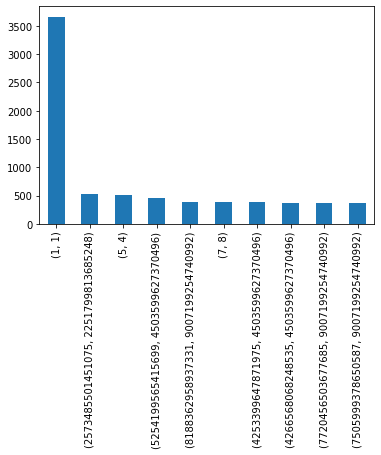

In [39]:
import matplotlib.pyplot as plt
print(sorted.plot.bar())

In [20]:
plt.savefig('ratio.png')

<Figure size 432x288 with 0 Axes>